In [1]:
import warnings
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import acquire as a
import prepare as p
import explore as e
import model as m

In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
readme_df = a.acquire_readmes()
readme_df = p.prep_df_for_nlp(readme_df,'readme_contents')


In [6]:
train, validate, test = p.split_data(readme_df,'language')

<AxesSubplot:>

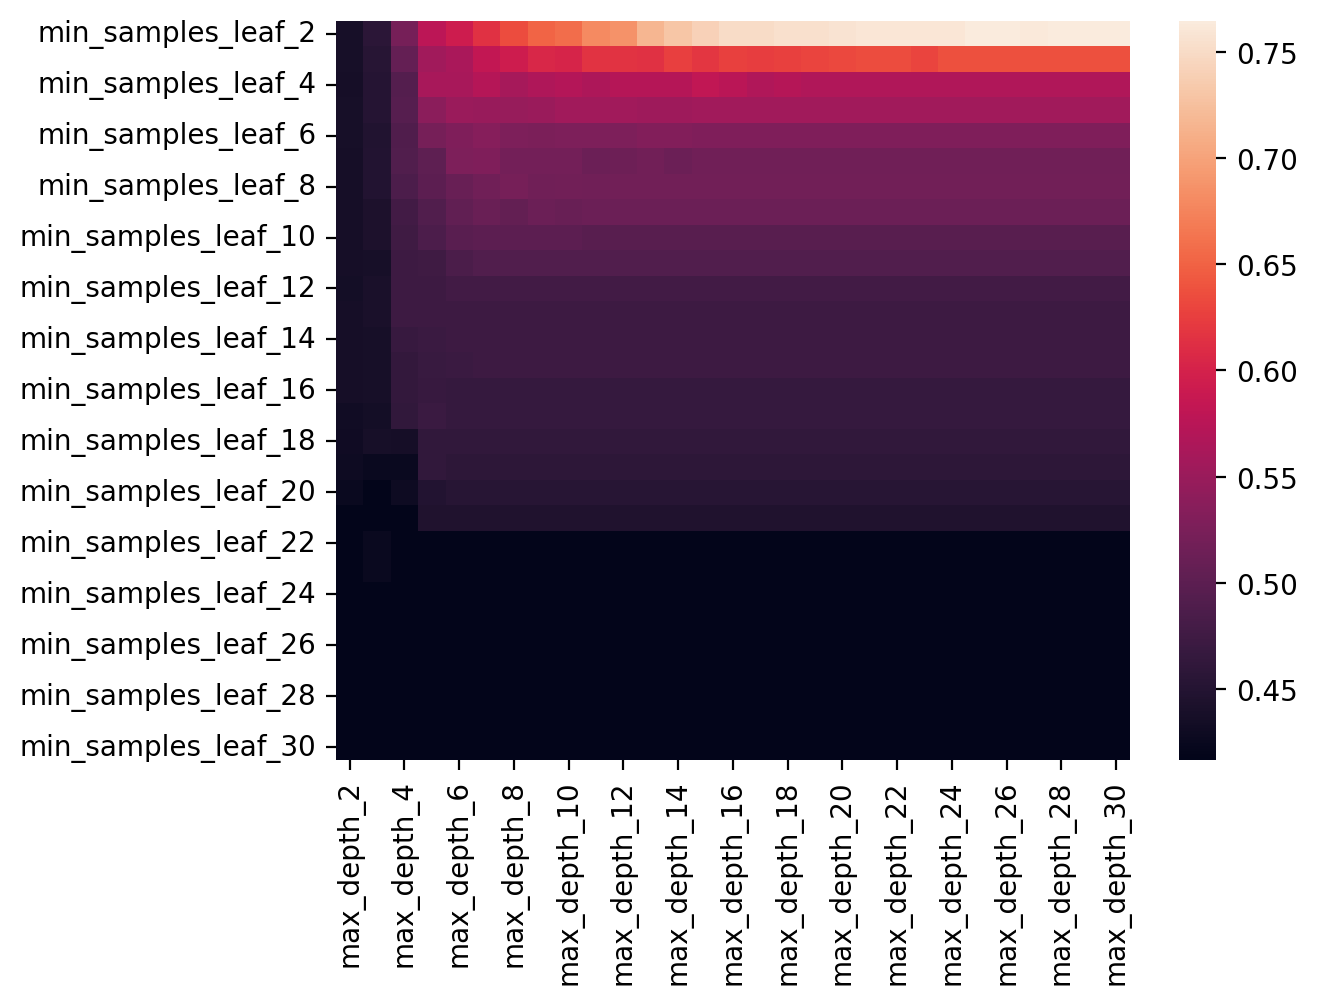

In [38]:
from sklearn.preprocessing import MinMaxScaler


reload(m)
train_x = m.encode_has_language(train)
scaler = MinMaxScaler()
scaled_data = m.scale(train.lemmatized_len,train.language,scaler)
train_x = pd.concat([scaled_data,train_x],axis=1)
train_y = train.language
rf_results = m.tune_random_forest(train_x,train_y)
sns.heatmap(rf_results)